In [1]:

import  pandas  as  pd
df = pd.DataFrame([{ "trajectory_number" :  '1' ,  "trajectory_type" :  "AKI" ,  "crossing_time_in_seconds" :  150 },
{ "trajectory_number" :  '2' ,  "trajectory_type" :  "AKI" ,  "crossing_time_in_seconds" :  800 },
{ "trajectory_number" :  '3' ,  "trajectory_type" :  "AKI" ,  "crossing_time_in_seconds" :  500 },
{ "trajectory_number" :  '4' ,  "trajectory_type" :  "Sepsis" ,  "crossing_time_in_seconds" :  1000 },
{ "trajectory_number" :  '5' ,  "trajectory_type" :  "Sepsis" ,  "crossing_time_in_seconds" :  1243 },
{ "trajectory_number" :  '6' ,  "trajectory_type" :  "Sepsis" ,  "crossing_time_in_seconds" :  1300 },
{ "trajectory_number" :  '7' ,  "trajectory_type" :  "Pneumonia" ,  "crossing_time_in_seconds" :  2304 },
{ "trajectory_number" :  '8' ,  "trajectory_type" :  "Pneumonia" ,  "crossing_time_in_seconds" :  2305 }
])

In [3]:
df

,trajectory_number,trajectory_type,crossing_time_in_seconds
0,1,AKI,150
1,2,AKI,800
2,3,AKI,500
3,4,Sepsis,1000
4,5,Sepsis,1243
5,6,Sepsis,1300
6,7,Pneumonia,2304
7,8,Pneumonia,2305


(array([1., 1., 0., 2., 0., 2., 0., 0., 0., 2.]),
 array([ 150. ,  365.5,  581. ,  796.5, 1012. , 1227.5, 1443. , 1658.5,
        1874. , 2089.5, 2305. ]),
 <BarContainer object of 10 artists>)

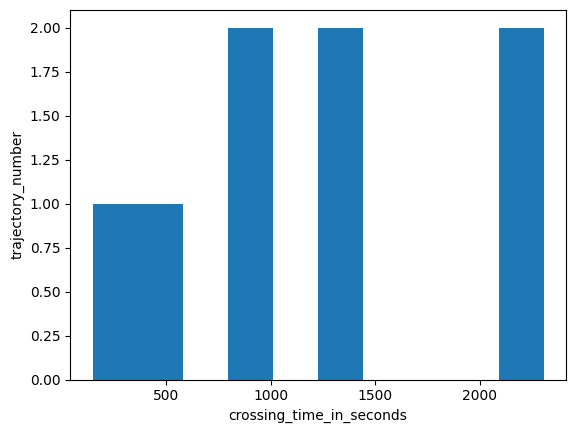

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#Create histogram in bin = 10
plt.xlabel("crossing_time_in_seconds")
plt.ylabel("trajectory_number")
plt.hist(df["crossing_time_in_seconds"], bins=10) 

(array([2., 2., 2., 0., 2.]),
 array([ 150.,  581., 1012., 1443., 1874., 2305.]),
 <BarContainer object of 5 artists>)

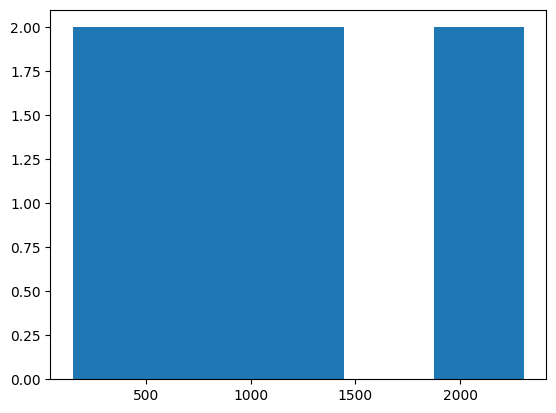

In [16]:
#Create histogram in bin = 5
plt.hist(df["crossing_time_in_seconds"], bins=5) 

<Axes: xlabel='trajectory_type', ylabel='crossing_time_in_seconds'>

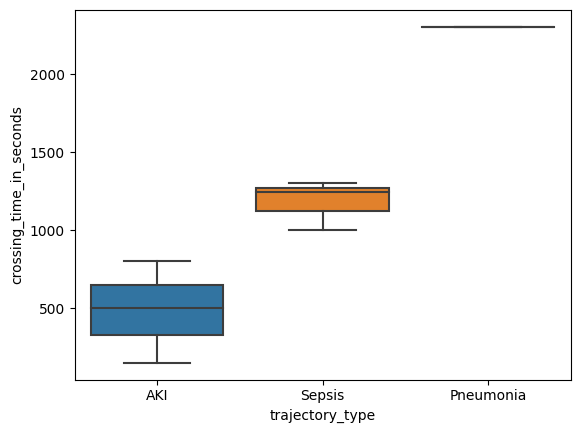

In [14]:
#Create box plots
sns.boxplot(x='trajectory_type', y='crossing_time_in_seconds', data=df)

In [15]:
#Add a column for crossing time in number of hours
def time_in_hours (time_in_secs):
  hours = float(time_in_secs/3600)
  return hours
  
df['time_in_hours'] = df['crossing_time_in_seconds'].map(time_in_hours)
df

,trajectory_number,trajectory_type,crossing_time_in_seconds,time_in_hours
0,1,AKI,150,0.041667
1,2,AKI,800,0.222222
2,3,AKI,500,0.138889
3,4,Sepsis,1000,0.277778
4,5,Sepsis,1243,0.345278
5,6,Sepsis,1300,0.361111
6,7,Pneumonia,2304,0.640000
7,8,Pneumonia,2305,0.640278


In [18]:
#Filter data frame for crossing time greater than 200 seconds
great_df = df[(df['crossing_time_in_seconds'] > 200)]
great_df

,trajectory_number,trajectory_type,crossing_time_in_seconds,time_in_hours
1,2,AKI,800,0.222222
2,3,AKI,500,0.138889
3,4,Sepsis,1000,0.277778
4,5,Sepsis,1243,0.345278
5,6,Sepsis,1300,0.361111
6,7,Pneumonia,2304,0.640000
7,8,Pneumonia,2305,0.640278


In [24]:
great_df.groupby(["trajectory_type"]).mean()

<ipython-input-24-4290cf38797f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  great_df.groupby(["trajectory_type"]).mean()


,crossing_time_in_seconds,time_in_hours
trajectory_type,,
AKI,650.0,0.180556
Pneumonia,2304.5,0.640139
Sepsis,1181.0,0.328056


In [25]:
great_df.groupby(["trajectory_type"]).median()

<ipython-input-25-beb67ec9b90d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  great_df.groupby(["trajectory_type"]).median()


,crossing_time_in_seconds,time_in_hours
trajectory_type,,
AKI,650.0,0.180556
Pneumonia,2304.5,0.640139
Sepsis,1243.0,0.345278
